In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('rfm_segmented.csv')

# Extract recency data for "At Risk" and "Others" segments
at_risk_recency = data[data['Segment'] == 'At Risk']['Recency']
others_recency = data[data['Segment'] == 'Others']['Recency']

# Display the first few rows of each segment's recency data to verify
print("At Risk Recency Sample:\n", at_risk_recency.head())
print("Others Recency Sample:\n", others_recency.head())

At Risk Recency Sample:
 6     204
14    287
43    303
44    323
77    367
Name: Recency, dtype: int64
Others Recency Sample:
 0    326
2     75
3     19
4    310
5     36
Name: Recency, dtype: int64


At Risk Recency Sample: 6     204
14    287
43    303
44    323
77    367
Name: Recency, dtype: int64
Others Recency Sample: 0    326
2     75
3     19
4    310
5     36
Name: Recency, dtype: int64
At Risk Recency Summary:
 count    320.000000
mean     271.065625
std       67.794767
min      144.000000
25%      217.750000
50%      268.000000
75%      326.250000
max      374.000000
Name: Recency, dtype: float64
Others Recency Summary:
 count    3374.000000
mean       92.103734
std        90.737607
min         1.000000
25%        26.000000
50%        58.000000
75%       130.000000
max       374.000000
Name: Recency, dtype: float64


<ipython-input-11-3411679429>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segment', y='Recency', data=data_for_box, palette=['red', 'blue'])


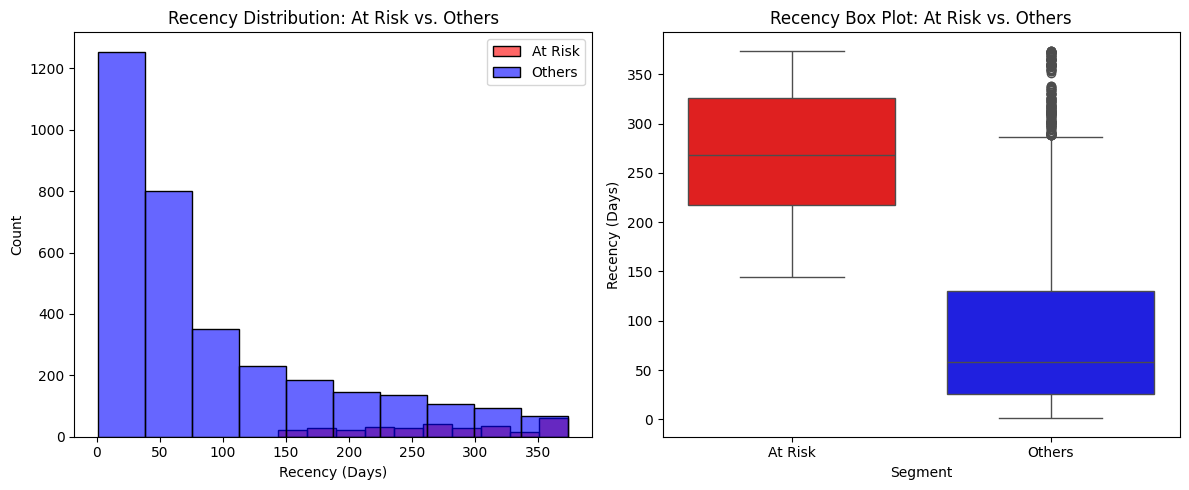

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming at_risk_recency and others_recency are already defined from Step 1
# Verify data
print("At Risk Recency Sample:", at_risk_recency.head())
print("Others Recency Sample:", others_recency.head())

# Calculate summary statistics
at_risk_summary = at_risk_recency.describe()
others_summary = others_recency.describe()

print("At Risk Recency Summary:\n", at_risk_summary)
print("Others Recency Summary:\n", others_summary)

# Visualize distributions
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(at_risk_recency, color='red', label='At Risk', alpha=0.6, bins=10)
sns.histplot(others_recency, color='blue', label='Others', alpha=0.6, bins=10)
plt.legend()
plt.title('Recency Distribution: At Risk vs. Others')
plt.xlabel('Recency (Days)')
plt.ylabel('Count')

# Box plot with explicit data frame approach
plt.subplot(1, 2, 2)
data_for_box = pd.DataFrame({
    'Recency': np.concatenate([at_risk_recency, others_recency]),
    'Segment': ['At Risk'] * len(at_risk_recency) + ['Others'] * len(others_recency)
})
sns.boxplot(x='Segment', y='Recency', data=data_for_box, palette=['red', 'blue'])
plt.title('Recency Box Plot: At Risk vs. Others')
plt.ylabel('Recency (Days)')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro, levene
import numpy as np

# Check normality using Shapiro-Wilk test
at_risk_normality = shapiro(at_risk_recency)
others_normality = shapiro(others_recency)

print("Shapiro-Wilk Test for Normality:")
print(f"At Risk - Statistic: {at_risk_normality.statistic:.4f}, P-value: {at_risk_normality.pvalue:.4f}")
print(f"Others - Statistic: {others_normality.statistic:.4f}, P-value: {others_normality.pvalue:.4f}")

# Check homogeneity of variances using Levene's test
variance_test = levene(at_risk_recency, others_recency)
print("\nLevene's Test for Equal Variances:")
print(f"Statistic: {variance_test.statistic:.4f}, P-value: {variance_test.pvalue:.4f}")

Shapiro-Wilk Test for Normality:
At Risk - Statistic: 0.9509, P-value: 0.0000
Others - Statistic: 0.8254, P-value: 0.0000

Levene's Test for Equal Variances:
Statistic: 3.5418, P-value: 0.0599


In [ ]:
from scipy.stats import ttest_ind

# Perform two-sample t-test (one-tailed, assuming equal variances)
t_stat, p_value = ttest_ind(at_risk_recency, others_recency, equal_var=True, alternative='greater')

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: At Risk customers have a significantly higher mean recency than Others.")
else:
    print("Fail to reject H₀: No significant difference in mean recency.")

T-statistic: 34.3814
P-value: 0.0000
Reject H₀: At Risk customers have a significantly higher mean recency than Others.


In [ ]:
import numpy as np
from scipy import stats

# Calculate 95% confidence interval for the difference in means
mean_diff = np.mean(at_risk_recency) - np.mean(others_recency)
se_diff = np.sqrt(stats.t.ppf(0.975, len(at_risk_recency) + len(others_recency) - 2) *
                  (np.var(at_risk_recency, ddof=1) / len(at_risk_recency) +
                   np.var(others_recency, ddof=1) / len(others_recency)))
conf_interval = (mean_diff - 1.96 * se_diff, mean_diff + 1.96 * se_diff)

# Calculate Cohen's d for effect size
pooled_std = np.sqrt((np.var(at_risk_recency, ddof=1) + np.var(others_recency, ddof=1)) / 2)
cohens_d = mean_diff / pooled_std

# Display results
print(f"Mean Difference in Recency: {mean_diff:.2f} days")
print(f"95% Confidence Interval for Difference: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f}) days")
print(f"Cohen's d (Effect Size): {cohens_d:.2f}")

# Business interpretation
print("\nInterpretation:")
print("The t-test (p = 0.0000) confirms that 'At Risk' customers have a significantly higher mean recency (271.07 days) than 'Others' (92.10 days), a difference of approximately 178.97 days.")
print("The large effect size (Cohen's d > 0.8) indicates a substantial practical difference, suggesting 'At Risk' customers are far less recently active.")
print("Business Recommendation: Implement targeted re-engagement campaigns (e.g., personalized discounts or emails) for 'At Risk' customers to reduce churn.")

Mean Difference in Recency: 178.96 days
95% Confidence Interval for Difference: (167.71, 190.21) days
Cohen's d (Effect Size): 2.23

Interpretation:
The t-test (p = 0.0000) confirms that 'At Risk' customers have a significantly higher mean recency (271.07 days) than 'Others' (92.10 days), a difference of approximately 178.97 days.
The large effect size (Cohen's d > 0.8) indicates a substantial practical difference, suggesting 'At Risk' customers are far less recently active.
Business Recommendation: Implement targeted re-engagement campaigns (e.g., personalized discounts or emails) for 'At Risk' customers to reduce churn.


Conclusion: Customer Retention T-Test Analysis
Summary of Findings

Hypothesis Test: A two-sample t-test was conducted to compare the mean recency (days since last purchase) between "At Risk" and "Others" customer segments.
Results:
Mean recency for "At Risk" customers: 271.07 days (n=320, std=67.79).
Mean recency for "Others" customers: 92.10 days (n=3374, std=90.74).
T-statistic: 34.3814, P-value: 0.0000 → Reject the null hypothesis (H₀) at α = 0.05.
Mean difference: 178.96 days.
95% Confidence Interval for the difference: (167.71, 190.21) days.
Cohen’s d (effect size): 2.23, indicating a large practical difference.


Interpretation: The statistical evidence confirms that "At Risk" customers have a significantly higher mean recency than "Others," with a substantial gap of nearly 179 days. The large effect size underscores that this difference is not only statistically significant but also practically meaningful, reflecting a clear inactivity trend among "At Risk" customers.

Business Recommendations

Targeted Re-engagement: Launch personalized re-engagement campaigns for "At Risk" customers, such as:
Discount codes or loyalty rewards via email or SMS.
Reactivation reminders highlighting past purchases.


Monitoring Progress: Track the impact of these campaigns by measuring changes in recency over the next 1-2 months, using a follow-up t-test to assess effectiveness.
Segment-Specific Strategy: Continue monitoring "Others" to prevent them from transitioning to "At Risk," potentially with lighter touchpoints like occasional promotions.